# Proyecto final portafolios Modulo V

El objetivo del examen final es construir un portafolio riesgoso con 7 acciones e invertir en un portafolio completo que maximice tu utilidad . Considera una tasa libre de riesgo de 5.0% , un premio por riesgo de mercado de 10.0% y un nivel de aversión al riesgo A=3

In [1]:
from scipy.optimize import minimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
path = "ipc.xlsx"
df_port = pd.read_excel(path, index_col=0)
df_port.head()

,KIMBERA MF Equity,GAPB MF Equity,CEMEXCPO MF Equity,ASURB MF Equity,GFNORTEO MF Equity,KOFUBL MF Equity,AC* MF Equity,LABB MF Equity,FEMSAUBD MF Equity,OMAB MF Equity,...,MEGACPO MF Equity,GCC* MF Equity,BIMBOA MF Equity,GMEXICOB MF Equity,GCARSOA1 MF Equity,TLEVICPO MF Equity,ALFAA MF Equity,BSMXB MF Equity,PINFRA* MF Equity,MEXBOL INDEX
DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,40.37,152.05,8.72,243.89,94.99,123.90,104.68,13.85,161.63,83.61,...,64.19,44.81,45.95,36.79,70.98,94.34,34.10,30.25,202.73,42977.50
2016-01-04,39.16,148.57,8.43,238.29,91.79,120.29,102.09,14.41,157.62,81.77,...,64.45,43.51,45.02,35.71,69.83,92.62,33.74,29.46,202.93,42113.70
2016-01-05,38.89,147.93,8.31,233.03,91.72,118.82,101.12,13.77,157.80,81.58,...,63.16,43.51,45.77,36.45,70.70,91.89,33.99,29.72,203.56,42041.68
2016-01-06,39.13,146.99,8.29,231.97,91.63,120.32,102.50,13.65,156.37,82.03,...,63.27,43.51,45.97,35.57,70.47,90.41,33.65,29.67,199.80,41691.19
2016-01-07,39.16,141.32,7.64,230.71,89.54,120.20,101.16,13.25,155.14,80.94,...,62.78,42.76,46.18,35.01,68.15,90.23,31.46,28.50,196.75,40661.57


##### Seleccion de acciones

In [3]:
random.seed(50620)
equities = random.sample(list(df_port.columns),7)
equities

['ALPEKA MF Equity',
 'ELEKTRA* MF Equity',
 'KOFUBL MF Equity',
 'PINFRA* MF Equity',
 'BBAJIOO MF Equity',
 'IENOVA* MF Equity',
 'LIVEPOLC MF Equity']

In [4]:
df_eq =df_port[equities]
df_eq.head()

,ALPEKA MF Equity,ELEKTRA* MF Equity,KOFUBL MF Equity,PINFRA* MF Equity,BBAJIOO MF Equity,IENOVA* MF Equity,LIVEPOLC MF Equity
DATE,,,,,,,
2016-01-01,24.19,379.04,123.90,202.73,NaN,72.34,210.11
2016-01-04,23.86,368.42,120.29,202.93,NaN,72.98,209.83
2016-01-05,23.52,357.30,118.82,203.56,NaN,71.48,210.42
2016-01-06,22.52,342.66,120.32,199.80,NaN,70.94,206.98
2016-01-07,22.26,334.15,120.20,196.75,NaN,72.31,209.60


### 1.- Rendimiento esperado diario y anual bajo 

#### a. Modelo de rendimiento promedio constante

In [5]:
ren = df_eq.pct_change().dropna(axis=0)
ren.columns = [col.replace(" MF Equity", "") for col in ren.columns]
ren.head(10)

,ALPEKA,ELEKTRA*,KOFUBL,PINFRA*,BBAJIOO,IENOVA*,LIVEPOLC
DATE,,,,,,,
2017-06-08,0.000896,0.011200,-0.008074,-0.003959,0.021695,-0.000341,0.008708
2017-06-09,0.004926,0.053559,-0.006642,-0.004337,0.003981,0.001708,-0.003720
2017-06-12,0.008913,0.032947,-0.000656,0.006326,0.007931,0.004319,-0.003241
2017-06-13,-0.012809,-0.007026,-0.016006,0.020146,-0.003279,0.039040,0.002262
2017-06-14,0.003579,-0.002493,0.001133,0.018132,0.002961,0.028861,0.002750
2017-06-15,0.000446,-0.017357,0.009190,-0.002927,-0.000328,0.010691,0.004219
2017-06-16,0.004456,-0.102989,-0.011415,0.021792,0.006890,-0.003456,0.016947
2017-06-19,-0.008873,-0.042389,0.021960,0.013683,0.008798,0.020809,-0.023619
2017-06-20,-0.007610,-0.022167,0.010646,0.000817,0.006137,-0.004015,0.009098


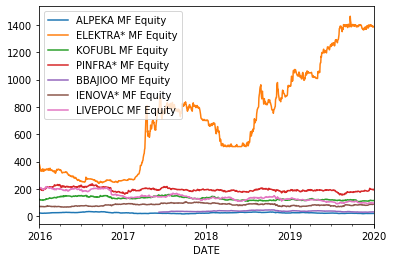

In [6]:
df_eq.plot()

In [7]:
#Rendimientos diarios
ren_daily=ren.mean() 
ren_daily

ALPEKA      0.000044
ELEKTRA*    0.000987
KOFUBL     -0.000349
PINFRA*     0.000126
BBAJIOO     0.000249
IENOVA*     0.000153
LIVEPOLC   -0.000395
dtype: float64

In [8]:
#Rendimientos anuales
rend_anual=ren_daily*252 
rend_anual

ALPEKA      0.011097
ELEKTRA*    0.248633
KOFUBL     -0.087839
PINFRA*     0.031631
BBAJIOO     0.062645
IENOVA*     0.038623
LIVEPOLC   -0.099428
dtype: float64

In [9]:
# Vector de pesos aleatorios
ran_weights = np.random.random(7)
ran_weights /= sum(ran_weights)
ran_weights

array([0.04017788, 0.17404001, 0.17641442, 0.1184977 , 0.203764  ,
       0.15500452, 0.13210147])

In [10]:
# Rendimiento esperado promedio constante
E_ren_pd = (ren_daily @ ran_weights) 
E_ren_pd

0.00014915564804533787

In [11]:
E_ren_pa = (ren_daily @ ran_weights)*252 
E_ren_pa

0.037587223307425144

In [12]:
S_p = np.sqrt(ran_weights.T @ (ren.cov()) @ ran_weights)
S_p

0.008533997235008868

#### b.Modelo CAPM
##### i.¿Cuál es la beta de cada acción?

Planteamiento: 
Tomar Mexbol como el mercado para calcular las $\beta's$



In [13]:
df_rends= df_eq.copy()
df_rends["MEXBOL INDEX"]=df_port["MEXBOL INDEX"]
df_rends=df_rends.pct_change().dropna(axis=0)
df_rends.head()

,ALPEKA MF Equity,ELEKTRA* MF Equity,KOFUBL MF Equity,PINFRA* MF Equity,BBAJIOO MF Equity,IENOVA* MF Equity,LIVEPOLC MF Equity,MEXBOL INDEX
DATE,,,,,,,,
2017-06-08,0.000896,0.011200,-0.008074,-0.003959,0.021695,-0.000341,0.008708,-0.003805
2017-06-09,0.004926,0.053559,-0.006642,-0.004337,0.003981,0.001708,-0.003720,-0.000117
2017-06-12,0.008913,0.032947,-0.000656,0.006326,0.007931,0.004319,-0.003241,0.000958
2017-06-13,-0.012809,-0.007026,-0.016006,0.020146,-0.003279,0.039040,0.002262,-0.002075
2017-06-14,0.003579,-0.002493,0.001133,0.018132,0.002961,0.028861,0.002750,0.005389


Calculo de las $\beta's$:

$\beta_{p}=\frac{\operatorname{Cov}\left(r_{p}, r_{b}\right)}{\operatorname{Var}\left(r_{b}\right)}$

In [14]:
betas=((df_rends.cov())/(df_rends.var()))['MEXBOL INDEX'].head(7)
betas

ALPEKA MF Equity      0.608449
ELEKTRA* MF Equity    0.405733
KOFUBL MF Equity      0.716950
PINFRA* MF Equity     0.605673
BBAJIOO MF Equity     0.833118
IENOVA* MF Equity     0.871632
LIVEPOLC MF Equity    1.006320
Name: MEXBOL INDEX, dtype: float64

##### ii.Clasifica las acciones en defensivas y agresivas

In [15]:
df_betas =pd.DataFrame(betas)
df_betas.columns=['beta']
df_betas['tipo']=df_betas['beta'].apply(lambda x: "defensiva" if x<=1 else 'ofensiva')
df_betas

,beta,tipo
ALPEKA MF Equity,0.608449,defensiva
ELEKTRA* MF Equity,0.405733,defensiva
KOFUBL MF Equity,0.716950,defensiva
PINFRA* MF Equity,0.605673,defensiva
BBAJIOO MF Equity,0.833118,defensiva
IENOVA* MF Equity,0.871632,defensiva
LIVEPOLC MF Equity,1.006320,ofensiva


### 2. Matriz varianza-covarianza 

#####  Diaria

In [16]:
m_vco_d = ren.cov() 
m_vco_d

,ALPEKA,ELEKTRA*,KOFUBL,PINFRA*,BBAJIOO,IENOVA*,LIVEPOLC
ALPEKA,0.000251,0.000008,0.000032,0.000029,0.000030,0.000031,0.000053
ELEKTRA*,0.000008,0.000318,0.000037,0.000018,0.000030,0.000029,0.000046
KOFUBL,0.000032,0.000037,0.000150,0.000034,0.000033,0.000043,0.000058
PINFRA*,0.000029,0.000018,0.000034,0.000163,0.000037,0.000046,0.000049
BBAJIOO,0.000030,0.000030,0.000033,0.000037,0.000210,0.000061,0.000073
IENOVA*,0.000031,0.000029,0.000043,0.000046,0.000061,0.000261,0.000079
LIVEPOLC,0.000053,0.000046,0.000058,0.000049,0.000073,0.000079,0.000276


In [17]:
m_vco_a=ren.cov()*252 #anual
m_vco_a

,ALPEKA,ELEKTRA*,KOFUBL,PINFRA*,BBAJIOO,IENOVA*,LIVEPOLC
ALPEKA,0.063234,0.001944,0.007950,0.007285,0.007491,0.007816,0.013399
ELEKTRA*,0.001944,0.080049,0.009249,0.004653,0.007478,0.007406,0.011643
KOFUBL,0.007950,0.009249,0.037859,0.008533,0.008376,0.010770,0.014665
PINFRA*,0.007285,0.004653,0.008533,0.041140,0.009307,0.011636,0.012466
BBAJIOO,0.007491,0.007478,0.008376,0.009307,0.052902,0.015370,0.018455
IENOVA*,0.007816,0.007406,0.010770,0.011636,0.015370,0.065807,0.019989
LIVEPOLC,0.013399,0.011643,0.014665,0.012466,0.018455,0.019989,0.069582



#### 3.- Frontera de carteras de mínima varianza y frontera eficiente / graficar

##### Diario

In [18]:
rf= 0.05/252
prize = 0.1/252
rcap = rf+betas*prize 
rcap

ALPEKA MF Equity      0.000440
ELEKTRA* MF Equity    0.000359
KOFUBL MF Equity      0.000483
PINFRA* MF Equity     0.000439
BBAJIOO MF Equity     0.000529
IENOVA* MF Equity     0.000544
LIVEPOLC MF Equity    0.000598
Name: MEXBOL INDEX, dtype: float64

##### Anual

In [19]:
rcap_a=rcap*252 
rcap_a

ALPEKA MF Equity      0.110845
ELEKTRA* MF Equity    0.090573
KOFUBL MF Equity      0.121695
PINFRA* MF Equity     0.110567
BBAJIOO MF Equity     0.133312
IENOVA* MF Equity     0.137163
LIVEPOLC MF Equity    0.150632
Name: MEXBOL INDEX, dtype: float64

In [20]:
def p_ren_a(weights, r):
    E_p = (rcap_a @ weights)
    return E_p

def p_vol_a(weights, r):
    S_p = np.sqrt(weights.T @ (r.cov()*252) @ weights)
    return S_p

In [70]:
weights_sim = np.random.random((5000, 7))
weights_sim = weights_sim / weights_sim.sum(axis=1, keepdims=True)
rend_sim = np.apply_along_axis(p_ren_a, 1, weights_sim, r=ren)
vol_sim = np.apply_along_axis(p_vol_a, 1, weights_sim, r=ren)

##### Mínima varianza Anual

In [71]:
sharpe_ratio = rend_sim / vol_sim

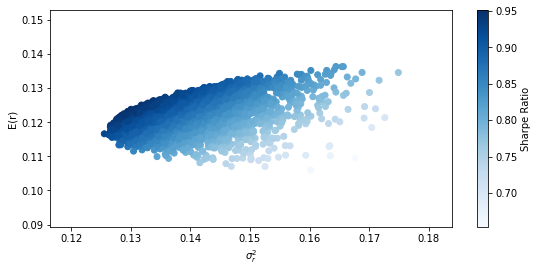

In [72]:
plt.figure(figsize=(9,4))
plt.scatter(vol_sim, rend_sim, c=sharpe_ratio,cmap='Blues')
plt.colorbar(label="Sharpe Ratio")
plt.xlabel(r"$\sigma^2_r$")
plt.ylabel("E(r)");


##### Calculo de la frontera eficiente 

In [73]:
def sum_weights(weights):
    return weights.sum() - 1 

In [74]:
w0  = np.random.randn(ren.shape[1])
constraints = [
    {"type": "eq", "fun": sum_weights}
]

In [75]:
p0 = minimize(p_vol_a, w0, constraints=constraints, args=ren)
p0

     fun: 0.125344632695075
     jac: array([0.12553636, 0.1250322 , 0.12513548, 0.12550346, 0.12527983,
       0.12561658, 0.12573204])
 message: 'Optimization terminated successfully.'
    nfev: 90
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([0.15670647, 0.12689403, 0.23363313, 0.22752734, 0.14702229,
       0.08717112, 0.02104562])

In [76]:
wp0 = p0.x
print(p_ren_a(wp0, ren))
print(p_vol_a(wp0, ren))

0.11717902596466973
0.125344632695075


In [77]:
sharpe_ratio = rend_sim / vol_sim

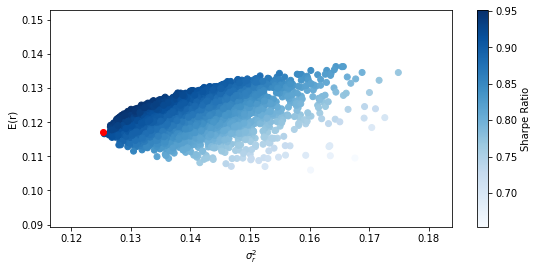

In [78]:

plt.figure(figsize=(9,4))
plt.scatter(vol_sim, rend_sim, c=sharpe_ratio, cmap='Blues')
plt.colorbar(label="Sharpe Ratio")
plt.scatter(p_vol_a(wp0, ren), p_ren_a(wp0, ren),color='r')

plt.xlabel(r"$\sigma^2_r$")
plt.ylabel("E(r)");

In [79]:
def rend_e(w, E):
    return p_ren_a(w, ren) - E 

In [80]:
r_min = p_ren_a(wp0, ren)
r_max = rcap_a.max()

rend_max = np.linspace(r_min, r_max)

In [81]:
pesos_optimos = []
for e in rend_max:
    constraints = [
        {"type": "eq", "fun": sum_weights},
        {"type": "eq", "fun": lambda w: rend_e(w, e)}
    ]

    port1 = minimize(p_vol_a, w0, constraints=constraints, args=ren)
    w_opt = port1.x
    pesos_optimos.append(w_opt)

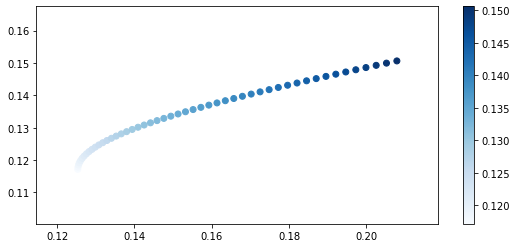

In [82]:
r_opt = []
v_opt = []
for w in pesos_optimos:
    r_opt.append(p_ren_a(w, ren))
    v_opt.append(p_vol_a(w, ren))

r_opt = np.array(r_opt)
v_opt = np.array(v_opt)

plt.figure(figsize=(9,4))
plt.scatter(v_opt, r_opt, c=r_opt, cmap='Blues')
plt.colorbar()

### 4.- Encuentra el portafolio riesgoso óptimo(maximiza el coeficiente de Sharpe)

In [83]:
rf = 0.05

def min_func_sharpe(weights):
    return - (p_ren_a(weights, ren) - rf) / p_vol_a(weights, ren)

constraints = [
    {"type": "eq", "fun": sum_weights}
]

bounds=[(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None)]



In [84]:
f_sharpe = minimize(min_func_sharpe, w0, constraints=constraints)
w_sharpe = f_sharpe.x
e_sharpe = p_ren_a(w_sharpe, ren)
vol_sharpe = p_vol_a(w_sharpe, ren)

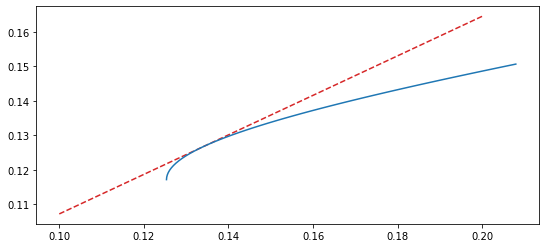

In [85]:


sigma_c =  np.linspace(0.1, 0.2)
sharpe = rf + sigma_c * (e_sharpe - rf) / vol_sharpe

plt.figure(figsize=(9,4))
plt.plot(sigma_c, sharpe, linestyle="--", c="tab:red")
plt.plot(v_opt, r_opt)


### 6.-Elige los porcentajes a invertir en el portafolio riesgoso óptimo y el activo libre de riesgo

In [86]:
pesos=pd.DataFrame(w_sharpe,columns=['Porcentajes'])
pesos.index=ren.columns
pesos['Free']=wp0
pesos

,Porcentajes,Free
ALPEKA,0.106152,0.156706
ELEKTRA*,0.027446,0.126894
KOFUBL,0.242720,0.233633
PINFRA*,0.144959,0.227527
BBAJIOO,0.194690,0.147022
IENOVA*,0.139470,0.087171
LIVEPOLC,0.144564,0.021046


#### Rendimiento del portafolio(Riesgo)

In [87]:
A=3
y_st=(e_sharpe-rf)/(A*vol_sharpe**2)
print('y_st =',y_st)
E_util=rf+y_st*(e_sharpe-rf)
V_util=y_st*vol_sharpe
print('Esperanza de la utilidad:   ', E_util)
print('Varianza de la utilizad:    ', V_util)

y_st = 1.4245495501813321
Esperanza de la utilidad:    0.15923203691149818
Varianza de la utilizad:     0.19081582473814743


In [88]:
e_sharpe = p_ren_a(w_sharpe, ren)
vol_sharpe = p_vol_a(w_sharpe, ren)
sigma_c =  np.linspace(0.1, 0.3)
sharpe = rf + sigma_c * (e_sharpe - rf) / vol_sharpe

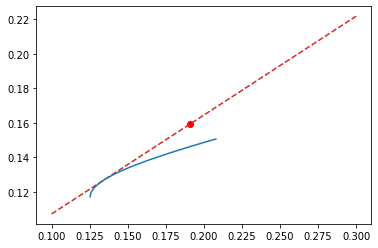

In [89]:

plt.plot(sigma_c, sharpe, linestyle="--", c="tab:red", 
         label="Capital Allocation Line")
plt.plot(v_opt, r_opt)
plt.scatter(V_util, E_util,c="r")